In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import data

anger_train = pd.read_csv(r"anger-ratings-0to1.train.txt",
                        sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(r"sadness-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(r"fear-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(r"joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

#  combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
anger_test = pd.read_csv(r"anger-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(r"sadness-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(r"fear-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(r"joy-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df.head()

id                                               text emotion  intensity
0  10857  @ZubairSabirPTI  pls dont insult the word 'Molna'   anger      0.479
1  10858  @ArcticFantasy I would have almost took offens...   anger      0.458
2  10859  @IllinoisLoyalty that Rutgers game was an abom...   anger      0.562
3  10860  @CozanGaming that's what lisa asked before she...   anger      0.500
4  10861  Sometimes I get mad over something so minuscul...   anger      0.708

In [4]:
#  shuffle dataset
# 透過sample隨機打亂順序，再返回一個打亂順序的dataframe
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)
train_df

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


id                                               text  emotion  \
412   10412    Listening to Joey really helps me and my anger.    anger   
565   10565  @SlaveGuinevere its more of a little prick tha...    anger   
1462  20605          you make my heart shake, bend and break.'     fear   
3177  40350  So now... yeah. I'm home again.\nStill feeling...  sadness   
24    10024  @LeKingCoq @MistaAggy @GiovanniiDC The way my ...    anger   
...     ...                                                ...      ...   
912   20055  Life long fear of havin a shit and a spider cr...     fear   
3055  40228  Some moving clips on youtube tonight of the vi...  sadness   
1441  20584  @bumbleb33tuna door and cleared his throat, tr...     fear   
451   10451  My leg feels like it's gonna burst, yet I'm st...    anger   
1577  20720      @Cinestrong something a cyber bully would say     fear   

      intensity  
412       0.500  
565       0.417  
1462      0.473  
3177      0.521  
24        0.792  
...         ...  
912       0.854  
3055      0.604  
1441      0.479  
451       0.333  
1577      0.417  

[3613 rows x 4 columns]

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
temp = train_df["text"].apply(lambda x : word_tokenize(x)) 
train_df["word_split"] = temp.apply(lambda words: [word for word in words if word not in string.punctuation])
temp = test_df["text"].apply(lambda x : word_tokenize(x)) 
test_df["word_split"] = temp.apply(lambda x : [i for i in x if i not in  string.punctuation])


In [6]:
train_df["word_split"][0]
test_df["word_split"][0]


['ZubairSabirPTI', 'pls', 'dont', 'insult', 'the', 'word', "'Molna"]

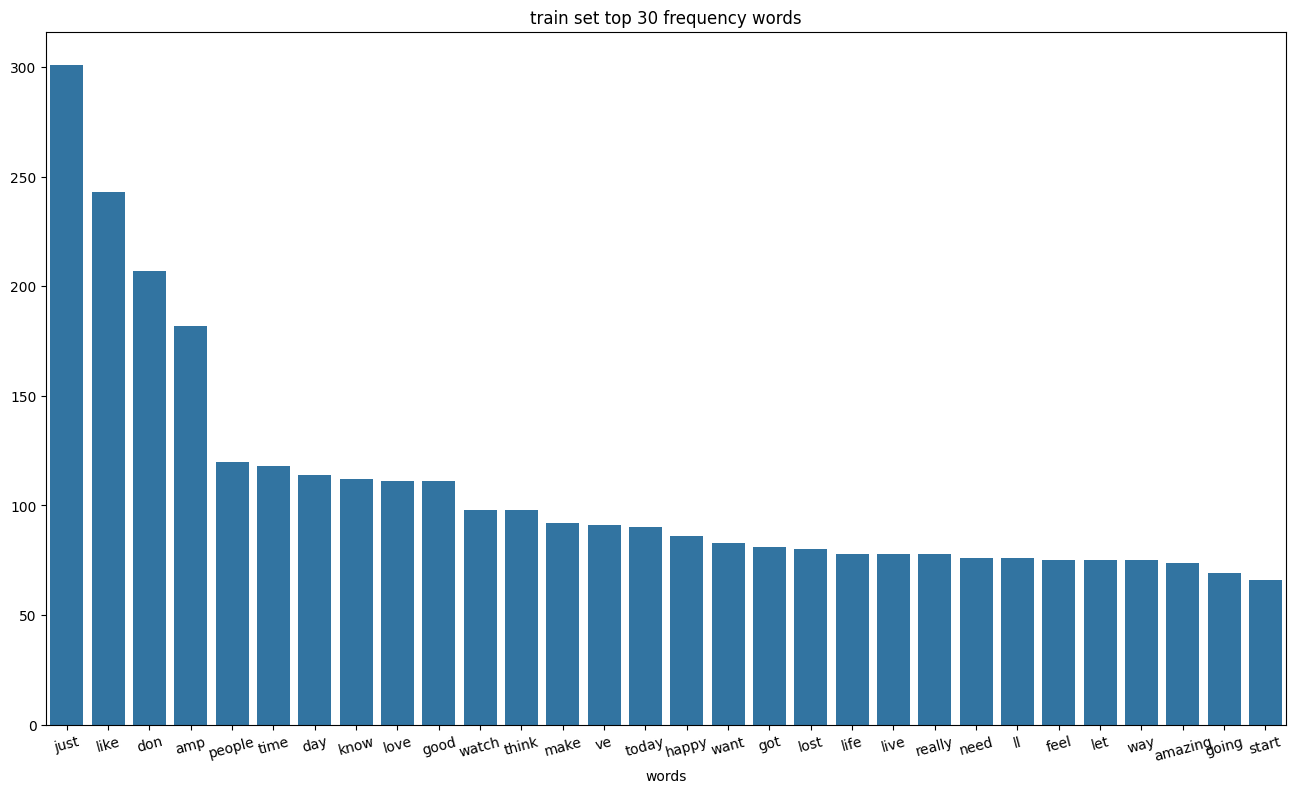

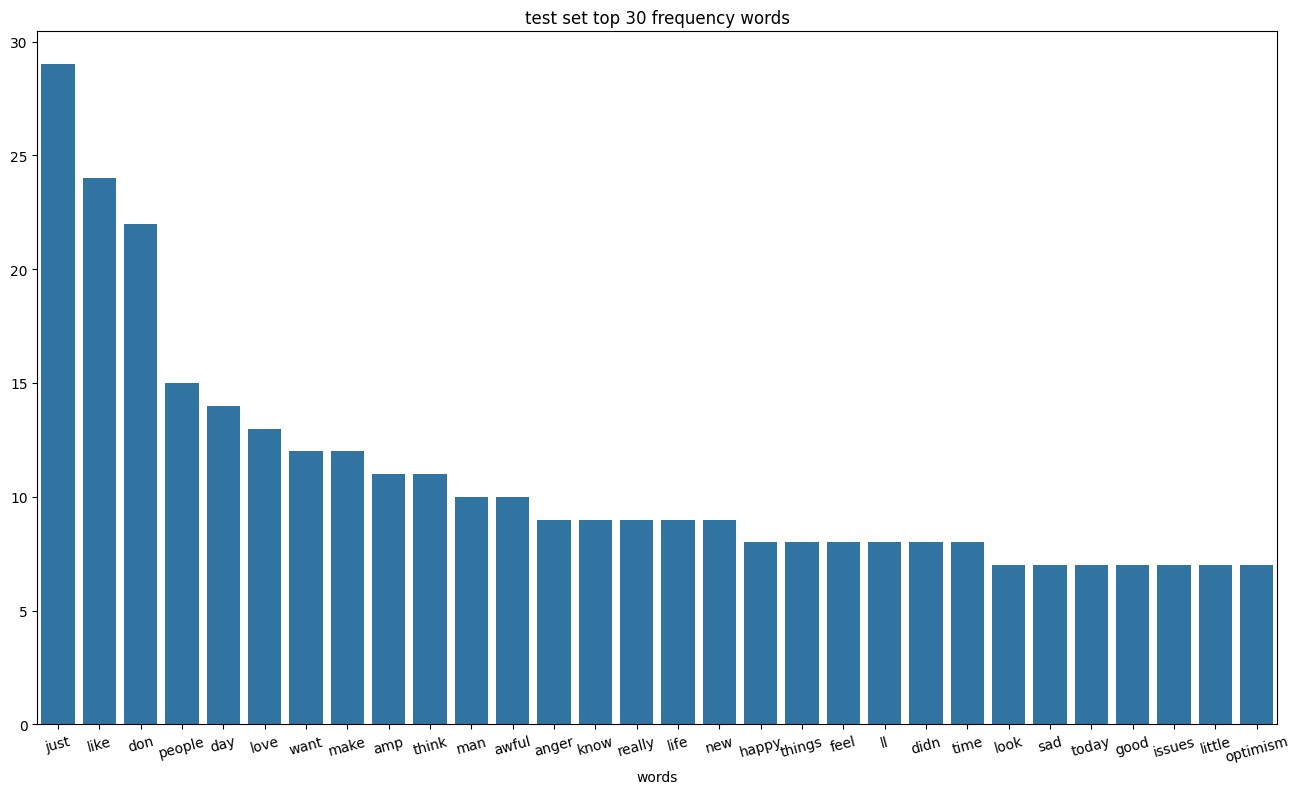

In [7]:
# exercise 1 做出BOW且找出frequency前30的並畫圖
# 設定清理stop words
from sklearn.feature_extraction.text import CountVectorizer

# 稀疏矩陣要記得toarray()
x_count=CountVectorizer(stop_words='english')
bow_train=x_count.fit_transform(train_df["text"])
feature_train=x_count.get_feature_names_out()
bow_train=pd.DataFrame(bow_train.toarray(),columns=feature_train)


temp=bow_train.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("train set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()

bow_test=x_count.transform(test_df["text"])
feature_test=x_count.get_feature_names_out()
bow_test=pd.DataFrame(bow_test.toarray(),columns=feature_test)

temp=bow_test.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("test set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()



In [8]:
# 資料用pickle儲存與讀取
# train_df.to_pickle("train_df.pkl") 
# test_df.to_pickle("test_df.pkl")
train_df=pd.read_pickle("train_df.pkl")
test_df=pd.read_pickle("test_df.pkl")

### EDA

In [9]:
train_df.groupby('emotion')['text'].count()


emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

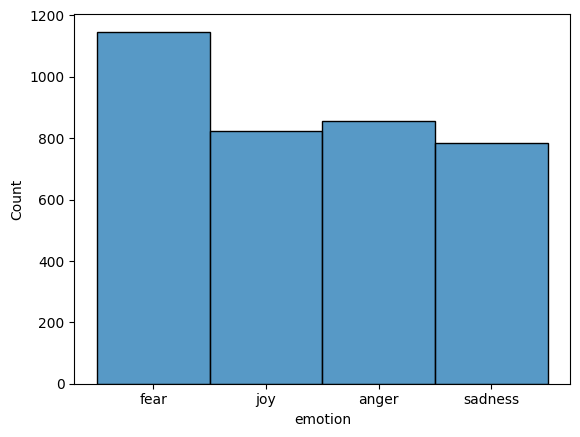

In [10]:
sns.histplot(data=train_df,x="emotion")
plt.show()

### Feature engineering

In [11]:
x_count = CountVectorizer()
train_bow = x_count.fit_transform(train_df["text"])
test_bow = x_count.transform(test_df["text"])
feature=x_count.get_feature_names_out()
feature[100:110]

"😂" in feature

False

In [12]:
import nltk
# 把表情符號納入feature(使用nltk.word_tokenize)
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
# check dimension
train_data_BOW_features_500.shape

c:\Users\mocce\Desktop\datamining\lab1\datamininglab\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [13]:
train_data_BOW_features_500.toarray()
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

"😂" in feature_names_500

True

In [14]:
# exercise 2
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
tfidf_token=TfidfVectorizer(tokenizer=nltk.word_tokenize,max_features=1000)
tfidf_matrix=tfidf_token.fit_transform(train_df["text"]).toarray()
tfidf_token.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

### using decision tree to predict

In [15]:
from sklearn.tree import DecisionTreeClassifier
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [16]:
# build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# training!
DT_model = DT_model.fit(X_train, y_train)

# predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'fear', 'fear', 'joy', 'sadness', 'fear', 'joy',
       'joy', 'sadness'], dtype=object)

In [17]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# acc_train = DT_model.score(X_test,y_test)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [18]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


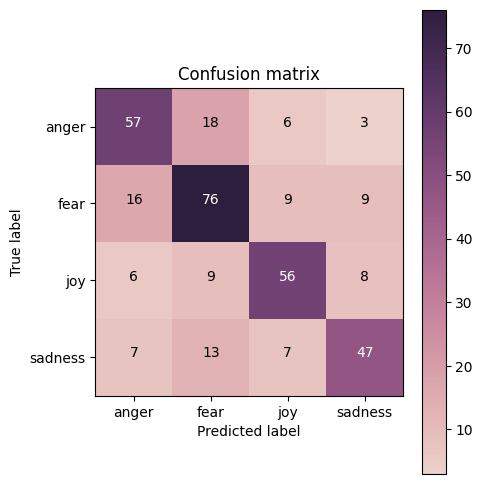

In [19]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### exercise 3

In [20]:
# exercise 3
# There is a overfitting problem becauese the accuracy of training set is 99%,testing accuracy is 68%.
# The model fit training set is good, but in out of sample is too bad


### Exercise 4
using naive bayse to predict

In [21]:
# exercise 4
import emoji

x_test = test_df["text"]
y_test = test_df['emotion']

# tokenizer=nltk.word_tokenize考慮表情符號，但會把標點符號視為一個特徵
def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    # 過濾掉標點符號，但保留表情符號
    filtered_tokens = [word for word in tokens if word not in string.punctuation or word in emoji.EMOJI_DATA]
    return filtered_tokens


x_count = CountVectorizer(tokenizer=custom_tokenizer,stop_words='english')
x_train = x_count.fit_transform(train_df['text'])
x_test = x_count.transform(test_df['text'])
x_train_df = pd.DataFrame(x_train.toarray(),columns=x_count.get_feature_names_out())
x_test_df = pd.DataFrame(x_test.toarray(),columns=x_count.get_feature_names_out())

c:\Users\mocce\Desktop\datamining\lab1\datamininglab\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(x_train_df, y_train)


MultinomialNB()

In [23]:
y_test_pred=nb_model.predict(x_test_df)
print(nb_model.score(x_train_df,y_train))
print(classification_report(y_test, y_test_pred))


0.976473844450595
              precision    recall  f1-score   support

       anger       0.81      0.73      0.77        84
        fear       0.74      0.81      0.77       110
         joy       0.79      0.82      0.81        79
     sadness       0.74      0.70      0.72        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347



### exercise 5
 decision tree is using gini to find the imformation gain, and set the node depend on the information gain.
 naive bayse method suppose every features are identical, find the probability of every scenerio(y) and output the biggest one.
 naive bayse is  better than decision tree in this case.

### 建構deep learning 模型 使用keras

In [25]:
import keras

# standardize name (X, y) 
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

c:\Users\mocce\Desktop\datamining\lab1\datamininglab\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1019     fear
1497     fear
2222      joy
139     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 開始建構模型

In [27]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = y_test.shape[1]
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500(自行決定)
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4(通常根據你最後有幾個類別決定)
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\Users\mocce\Desktop\datamining\lab1\datamininglab\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3292 - loss: 1.3540 - val_accuracy: 0.4611 - val_loss: 1.2580
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 1.0602 - val_accuracy: 0.6628 - val_loss: 0.9063
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.5965 - val_accuracy: 0.6916 - val_loss: 0.7808
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3919 - val_accuracy: 0.6801 - val_loss: 0.7841
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.3082 - val_accuracy: 0.7089 - val_loss: 0.8312
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9139 - loss: 0.2578 - val_accuracy: 0.6916 - val_loss: 0.8588
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9341 - loss: 0.2099 - val_accuracy: 0.6945 - val_loss: 0.9374
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9462 - loss: 0.1726 - val_accuracy: 0.6888 - val_

In [30]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.9390574e-04, 6.0883880e-04, 9.3867898e-01, 6.0518250e-02],
       [8.2050155e-06, 9.9994266e-01, 1.0370107e-08, 4.9135579e-05],
       [3.9211955e-06, 9.9004376e-01, 9.8403487e-03, 1.1201559e-04],
       [1.1394323e-01, 8.6704379e-01, 1.0272145e-02, 8.7408582e-03],
       [2.7354020e-01, 7.2472119e-01, 1.7340159e-03, 4.5774127e-06]],
      dtype=float32)

In [31]:
from sklearn.preprocessing import LabelEncoder

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]



array(['joy', 'fear', 'fear', 'fear', 'fear'], dtype=object)

In [32]:

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [33]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(r"training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.376972  1.317848      0.461095  1.258016
1       1  0.665652  0.958390      0.662824  0.906268
2       2  0.798229  0.570365      0.691643  0.780757
3       3  0.848602  0.411203      0.680115  0.784121
4       4  0.885691  0.327726      0.708934  0.831243
5       5  0.906172  0.270248      0.691643  0.858837
6       6  0.930805  0.218493      0.694524  0.937394
7       7  0.937171  0.189670      0.688761  0.984034
8       8  0.950733  0.156706      0.694524  1.066322
9       9  0.956823  0.138987      0.677233  1.112736
10     10  0.963188  0.121200      0.688761  1.149292
11     11  0.967063  0.106275      0.671470  1.244378
12     12  0.971769  0.097010      0.665706  1.245006
13     13  0.970385  0.093607      0.657061  1.283632
14     14  0.972876  0.087873      0.682997  1.371850
15     15  0.973706  0.085086      0.657061  1.370087
16     16  0.973706  0.075750      0.654179  1.393062
17     17  0.976474  0.074400      0.668588  1.495417
18     18  0.974260  0.076457      0.668588  1.463954
19     19  0.975644  0.068003      0.682997  1.496502
20     20  0.978135  0.066479      0.659942  1.618038
21     21  0.977304  0.064113      0.668588  1.579684
22     22  0.979518  0.058804      0.677233  1.604178
23     23  0.976197  0.063625      0.674352  1.632557
24     24  0.979518  0.056329      0.680115  1.643152

### Exercise 6

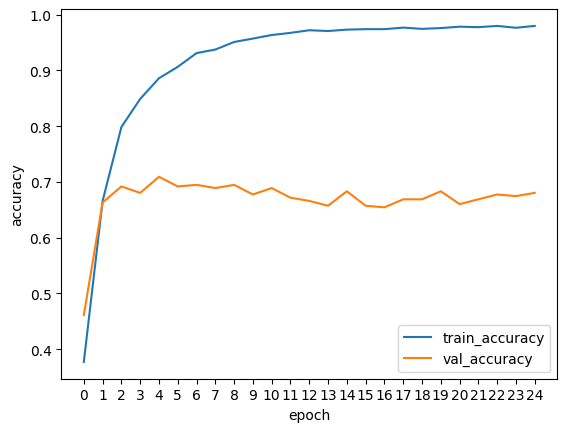

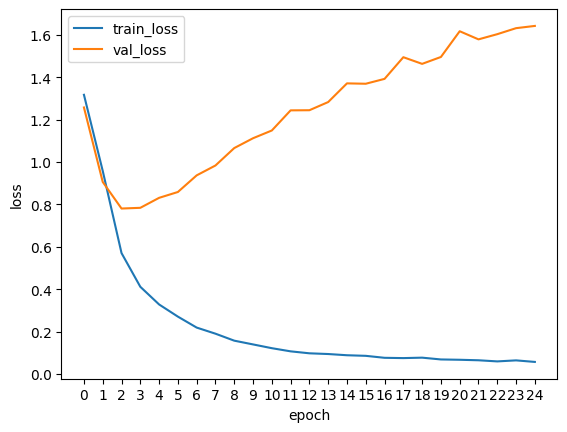

In [34]:
# exercise 6

sns.lineplot(training_log,x="epoch",y="accuracy",label="train_accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="val_accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="train_loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="val_loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()

# We can see when epoch up to 2, loss in val is larger than train. It means that there is overfitting when epoch larger than 2. 

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [35]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
1019  20162  onus is on Pakistan' : MEAIndia after #Uri #te...   
1497  20640  When I walk in darkness of despondency, Sc.ver...   
2222  30218  Why have I only just started watching glee thi...   
139   10139  @ManUtd you have had from me over the years is...   
2547  30543  lol! no mention of pak PM or even his speech o...   

                                         text_tokenized  
1019  [onus, is, on, Pakistan, ', :, MEAIndia, after...  
1497  [When, I, walk, in, darkness, of, despondency,...  
2222  [Why, have, I, only, just, started, watching, ...  
139   [@, ManUtd, you, have, had, from, me, over, th...  
2547  [lol, !, no, mention, of, pak, PM, or, even, h...

In [36]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['onus', 'is', 'on', 'Pakistan', "'", ':', 'MEAIndia', 'after', '#', 'Uri', '#', 'terror', 'attack']),
       list(['When', 'I', 'walk', 'in', 'darkness', 'of', 'despondency', ',', 'Sc.verses', 'I', "'ve", 'memorized', 'shine', 'a', 'light', 'in', 'my', 'heart', '.', 'Ex', ':', 'Lam', '3:22-25']),
       list(['Why', 'have', 'I', 'only', 'just', 'started', 'watching', 'glee', 'this', 'week', 'I', 'am', 'now', 'addicted', '🙄', '#', 'glee', '#', 'GLEEK'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [37]:
from gensim.models import Word2Vec

## setting
vector_dim = 100        # 含義：詞向量的維度。對每個單詞，模型會生成一個固定長度的向量（如 [0.1, -0.2, 0.3, ...]）。vector_size 決定了這些向量的長度
window_size = 5         # 上下文窗口的大小，指模型在訓練時，考慮每個詞的周圍多少個詞來捕捉語義。
min_count = 1           # 忽略語料中出現頻率低於 min_count 的單詞
training_epochs = 20    # 每次訓練，模型會將語料完整地掃描一遍，這稱為「一個 epoch」。在一次 epoch 中，所有的句子或文檔都被用來更新模型的參數。2個epochs可以理解成模型訓練過一次了，基於訓練後的模型再訓練一次，有點像deep learning


## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

2024-12-06 11:25:30,188 : INFO : collecting all words and their counts
2024-12-06 11:25:30,189 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-06 11:25:30,208 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2024-12-06 11:25:30,211 : INFO : Creating a fresh vocabulary
2024-12-06 11:25:30,244 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2024-12-06T11:25:30.244719', 'gensim': '4.3.3', 'python': '3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2024-12-06 11:25:30,245 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2024-12-06T11:25:30.245720', 'gensim': '4.3.3', 'python': '3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]', 

In [38]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']  # 從模型中找到單詞的向量，單一詞的向量根據這次的設定有100個
word_vec

array([ 0.03628176,  0.2955947 ,  0.06014878, -0.01514818, -0.18427776,
       -1.2545738 ,  0.7265463 ,  1.3901142 , -0.22817345, -0.44059238,
       -0.5531078 , -0.7688067 , -0.20717077,  0.20693025, -0.44450432,
       -0.45182085,  0.23681627, -0.37818286,  0.13322893, -0.96019244,
        0.2473407 ,  0.7881892 ,  0.17153846,  0.22546855,  0.04383304,
        0.12761427, -0.6166036 ,  0.59176385, -0.15395404,  0.01417772,
        0.38598666,  0.03662255,  0.4021355 , -0.6549195 , -0.52950466,
        0.18882573,  0.45987555,  0.17542824, -0.5286405 , -0.32508817,
       -0.15145513,  0.337261  ,  0.03075108,  0.1103038 ,  0.70533735,
        0.01991843, -1.2503746 ,  0.07146174,  0.10397523,  0.5113559 ,
       -0.14950505, -0.47093263,  0.06328453, -0.09802149, -0.43853736,
       -0.35936514,  0.37029582, -0.12439676,  0.06797056, -0.07097258,
        0.15283561, -0.17706987,  0.49029085,  0.05025573, -0.6960156 ,
        0.5683632 ,  0.22092573,  0.76793224, -1.4052304 ,  0.38

In [39]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)     # 是餘弦相似度(向量內積)，0~1

[('birthday', 0.9377903342247009),
 ('Be', 0.9351295232772827),
 ('bday', 0.9201992154121399),
 ('blessed', 0.9186722040176392),
 ('Kik', 0.9165278077125549),
 ('O', 0.9152586460113525),
 ("'you", 0.9127664566040039),
 ('plz', 0.911816418170929),
 ('help', 0.9106475710868835),
 ('establishment', 0.9104745984077454)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [40]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
# load 已經train好的模型
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

2024-12-06 11:25:31,323 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2024-12-06 11:25:57,950 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-12-06T11:25:57.949232', 'gensim': '4.3.3', 'python': '3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [41]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context
glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

2024-12-06 11:26:34,022 : INFO : loading projection weights from C:\Users\mocce/gensim-data\glove-twitter-25\glove-twitter-25.gz
2024-12-06 11:27:28,563 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 25) matrix of type float32 from C:\\Users\\mocce/gensim-data\\glove-twitter-25\\glove-twitter-25.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-12-06T11:27:28.563494', 'gensim': '4.3.3', 'python': '3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}


load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [42]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?
也就是要把各個word vector整合轉換為sentence vector


### RNN
$$ h_t = f(W_h\cdot x_t + U_h \cdot h_{t-1} + b_h) $$


In [43]:
# Use RNN model to let these words represent sentence
# notice: RNN need pretrained data. In sentence, we should do word embedding.
# 像 word2vec 把各個字的vector算出來，再用RNN把整個句子呈現
# 丟進去很多x，透過序列算法最終整合成一個h
# output 其實就是每個 hidden 序列下來的每個結果的紀錄
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence


## create the training corpus
# training_corpus = train_df['text_tokenized'].values
# training_corpus[:3]

temp_list=[]
lengths = []
for i in training_corpus:
    temp=np.zeros((len(i),vector_dim))
    for count,j in enumerate(i):
        temp[count]=word2vec_model.wv[j]      
    temp_list.append(temp)
    lengths.append(len(i))


max_length = max(lengths)  # 找到最長序列的長度
padded_sequences = np.zeros((len(temp_list), max_length, vector_dim), dtype=np.float32)  # 初始化填充矩陣
for i, seq in enumerate(temp_list):
    padded_sequences[i, :len(seq), :] = seq
padded_sequences
three_dim = np.stack(padded_sequences)
three_dim

sentence_vectors = torch.tensor(three_dim)  
rnn = nn.RNN(input_size=vector_dim, hidden_size=256, batch_first=True)  # hidden_size 為 RNN 輸出的維度
output, hidden = rnn(sentence_vectors)
hidden

tensor([[[-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
         [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
         [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
         ...,
         [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
         [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
         [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682]]],
       grad_fn=<StackBackward0>)

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [44]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]
X

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


[array([ 0.03628176,  0.2955947 ,  0.06014878, -0.01514818, -0.18427776,
        -1.2545738 ,  0.7265463 ,  1.3901142 , -0.22817345, -0.44059238,
        -0.5531078 , -0.7688067 , -0.20717077,  0.20693025, -0.44450432,
        -0.45182085,  0.23681627, -0.37818286,  0.13322893, -0.96019244,
         0.2473407 ,  0.7881892 ,  0.17153846,  0.22546855,  0.04383304,
         0.12761427, -0.6166036 ,  0.59176385, -0.15395404,  0.01417772,
         0.38598666,  0.03662255,  0.4021355 , -0.6549195 , -0.52950466,
         0.18882573,  0.45987555,  0.17542824, -0.5286405 , -0.32508817,
        -0.15145513,  0.337261  ,  0.03075108,  0.1103038 ,  0.70533735,
         0.01991843, -1.2503746 ,  0.07146174,  0.10397523,  0.5113559 ,
        -0.14950505, -0.47093263,  0.06328453, -0.09802149, -0.43853736,
        -0.35936514,  0.37029582, -0.12439676,  0.06797056, -0.07097258,
         0.15283561, -0.17706987,  0.49029085,  0.05025573, -0.6960156 ,
         0.5683632 ,  0.22092573,  0.76793224, -1.4

In [45]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


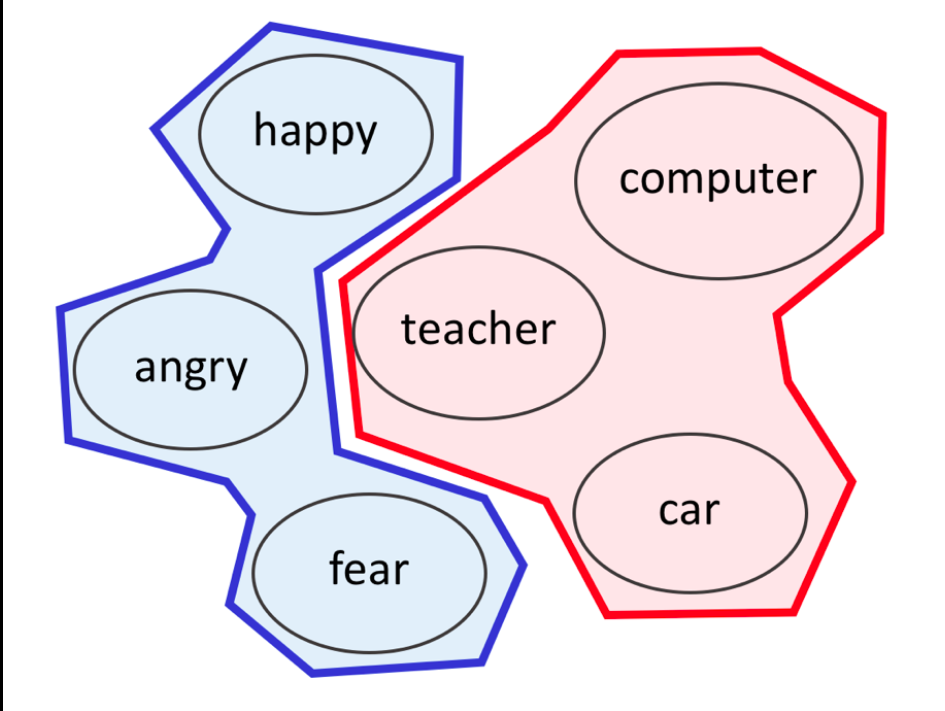

In [46]:
from PIL import Image
image = Image.open(r"C:\Users\mocce\Pictures\Screenshots\螢幕擷取畫面 2024-12-05 163949.png")
image

In [47]:
#check cluster membership
# 用不同的words來測試 前提是要把這個word已經轉成vector
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [48]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

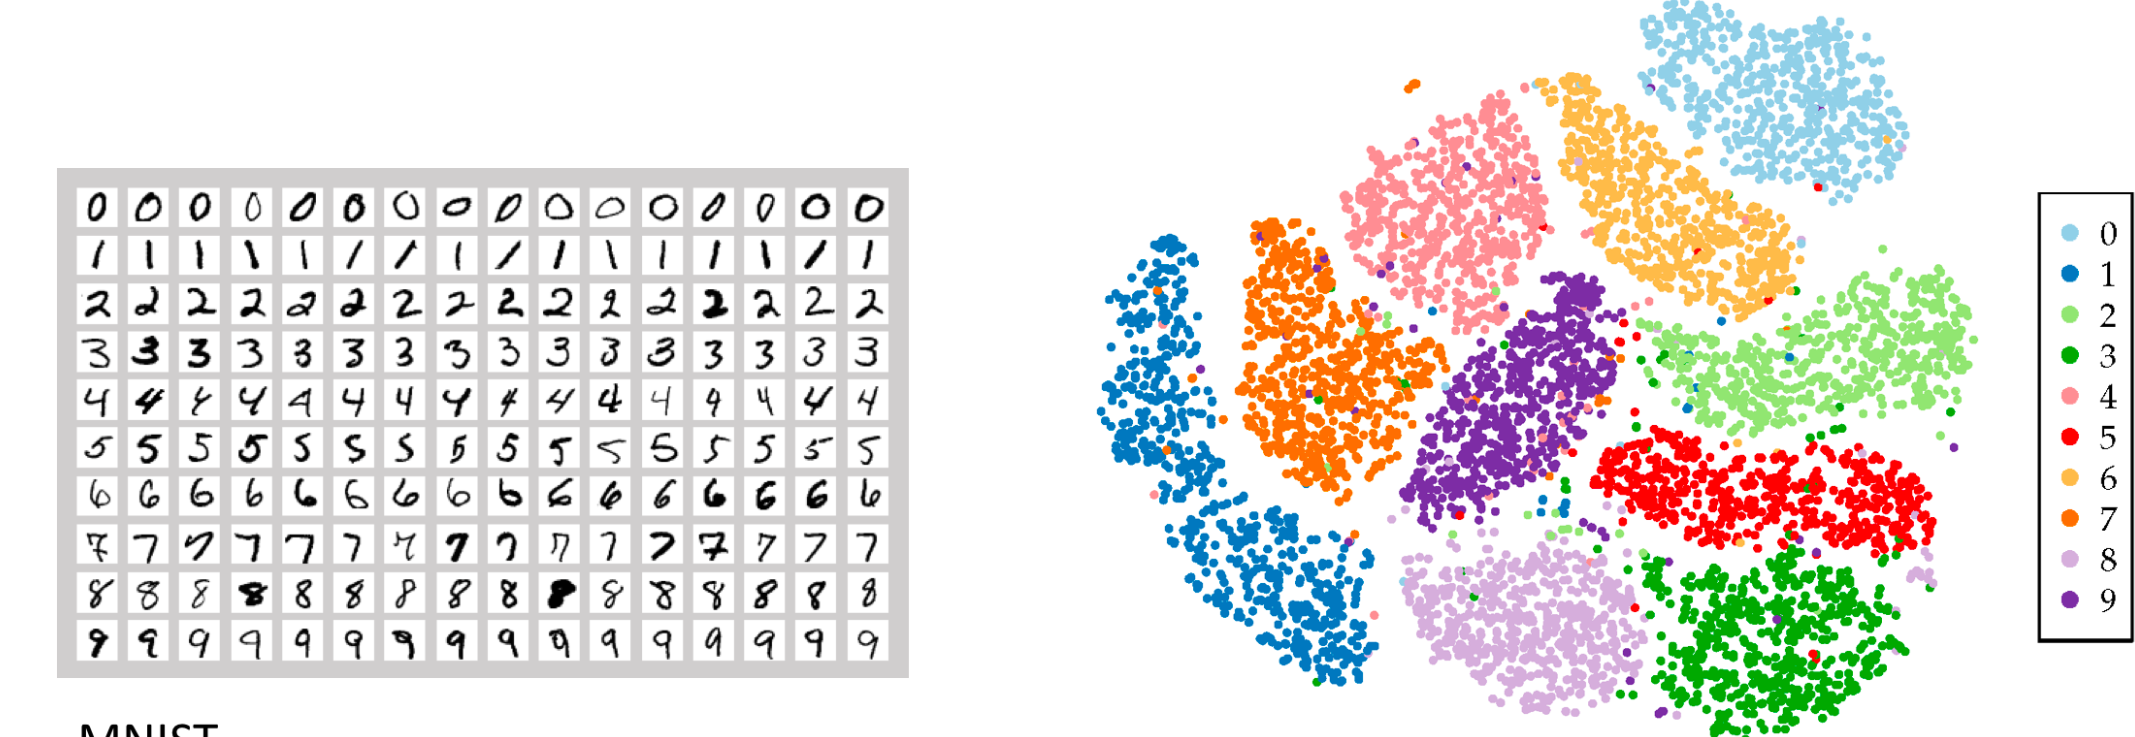

In [49]:
image = Image.open(r"C:\Users\mocce\Pictures\Screenshots\螢幕擷取畫面 2024-12-05 164825.png")
image
# t-sne

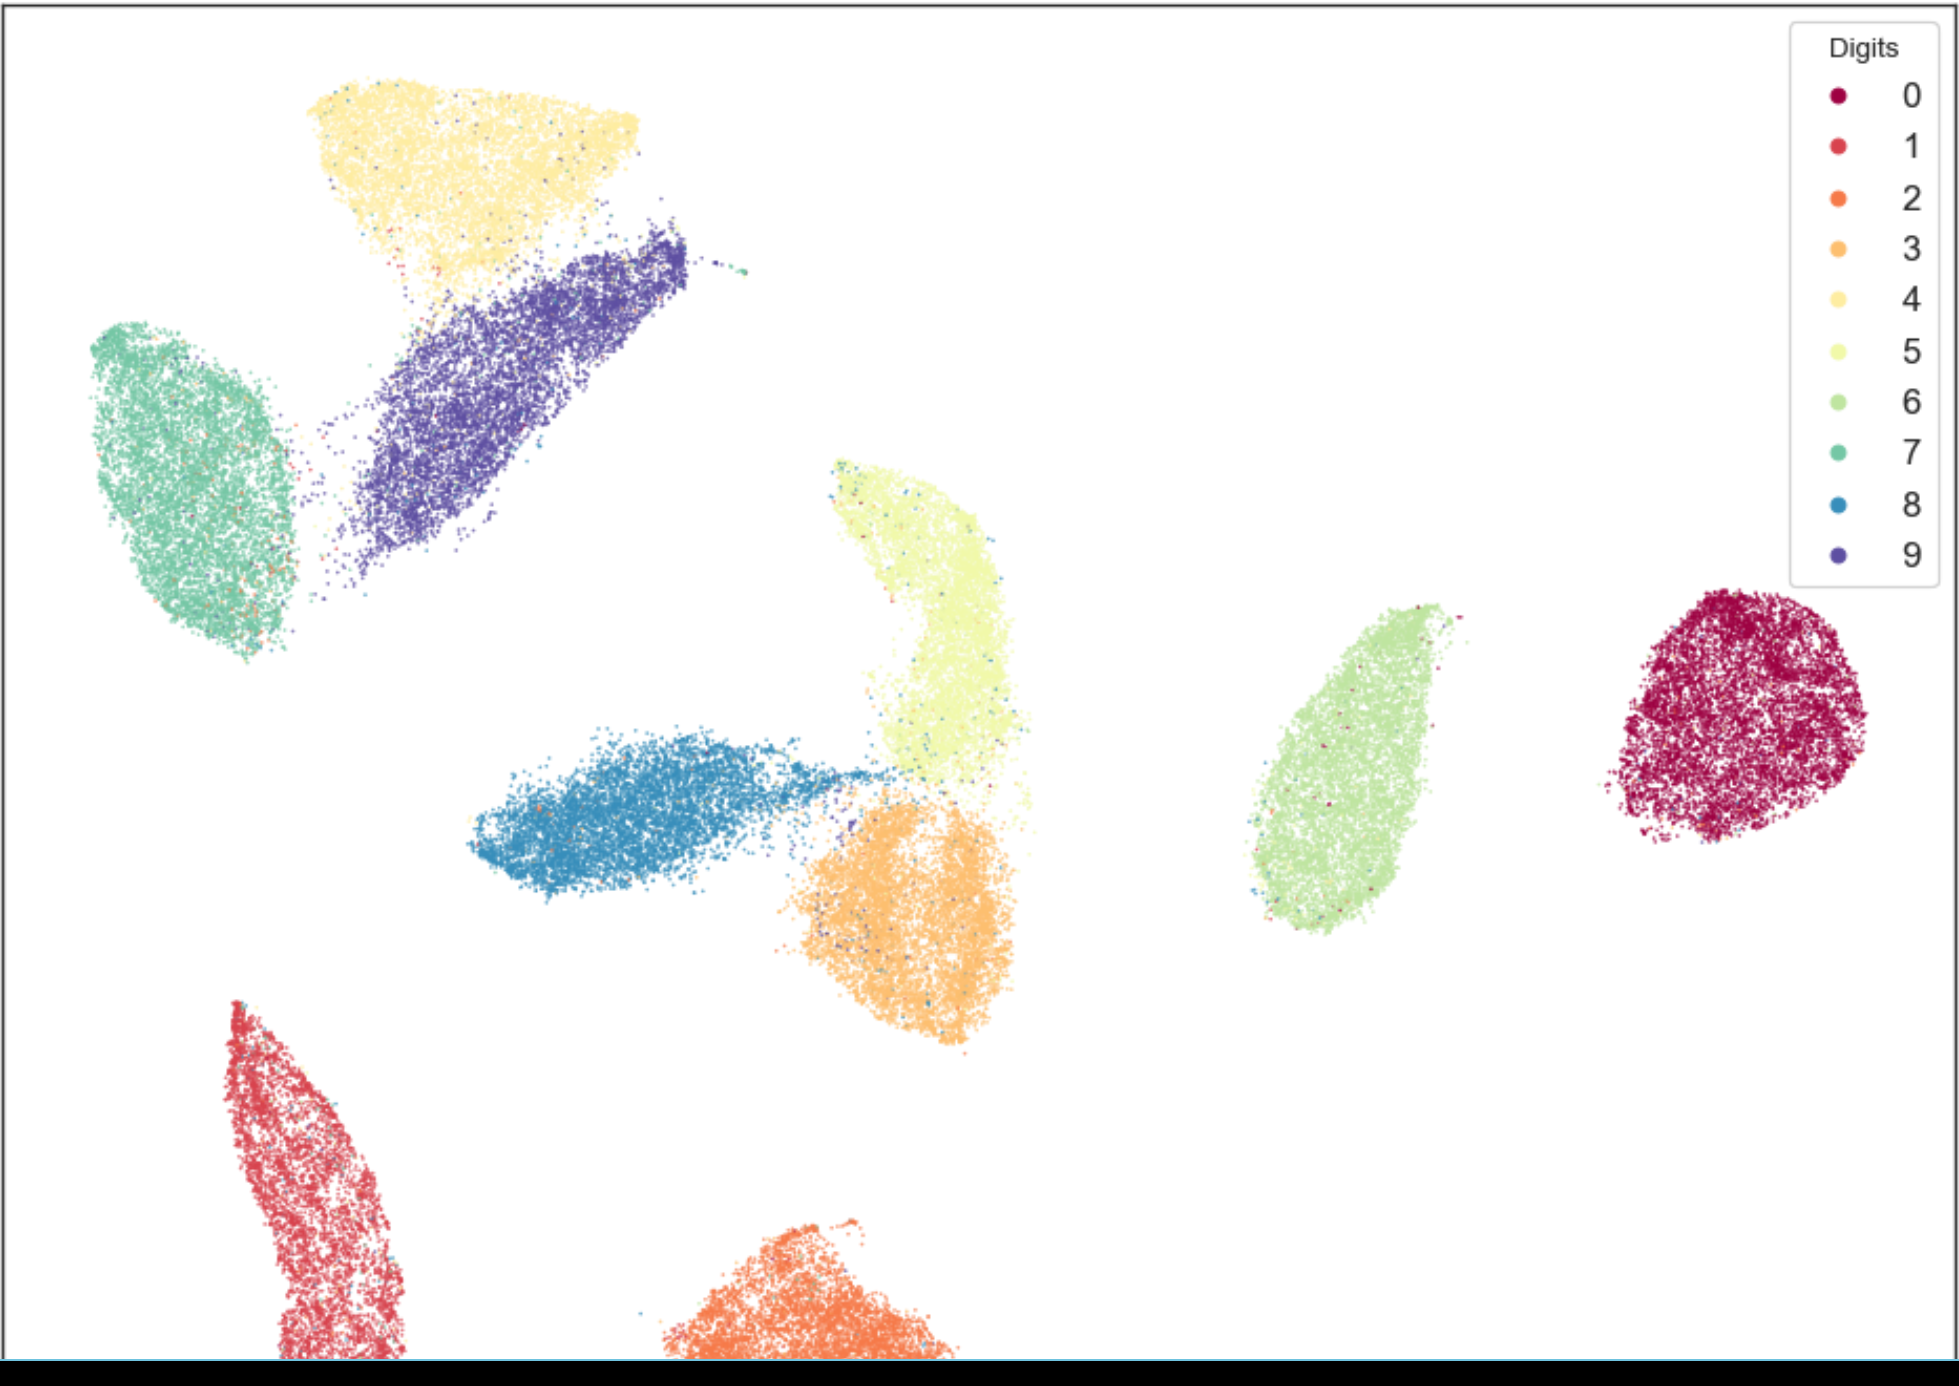

In [50]:
image = Image.open(r"C:\Users\mocce\Pictures\Screenshots\螢幕擷取畫面 2024-12-05 164902.png")
image
# UMAP

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [51]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


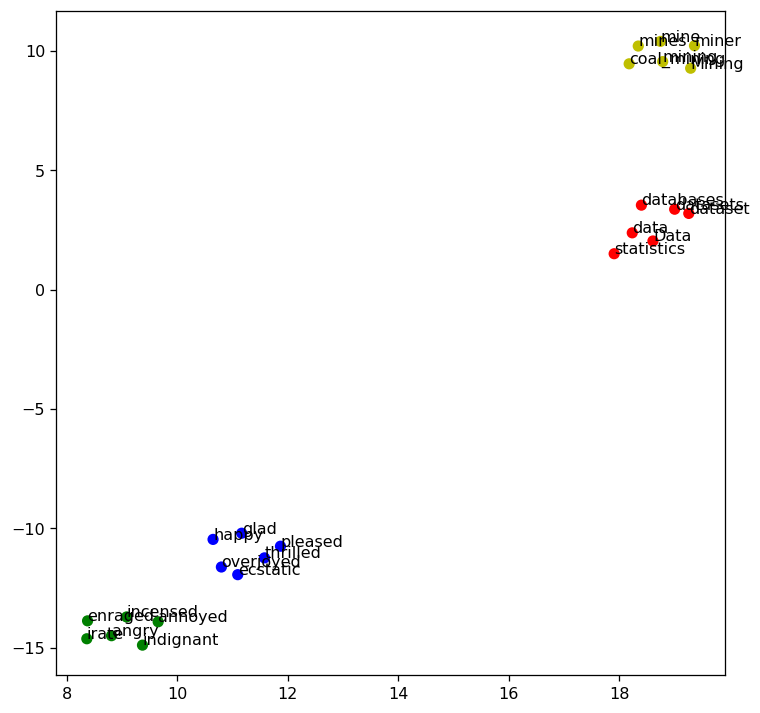

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

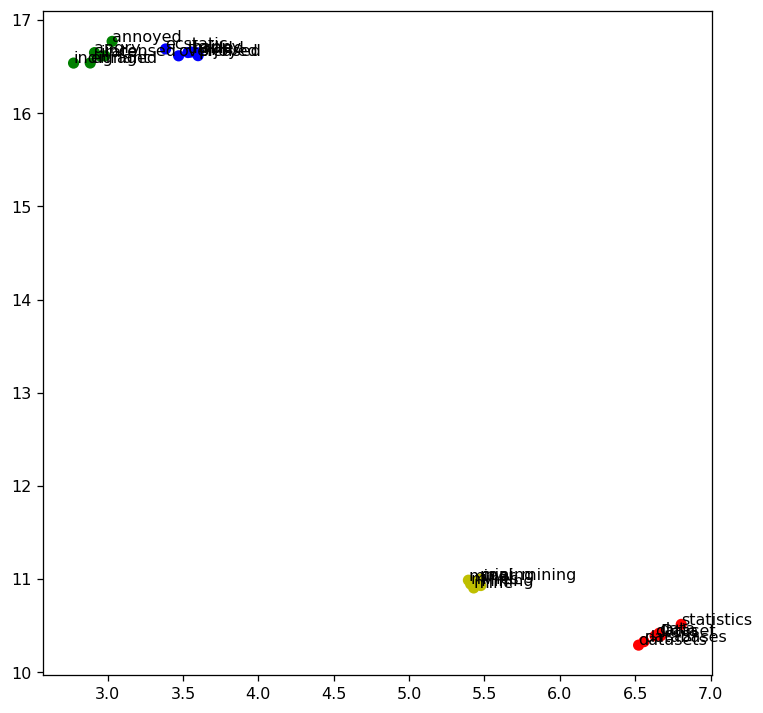

In [53]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [54]:
word_list = ['happy', 'angry', 'sac', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


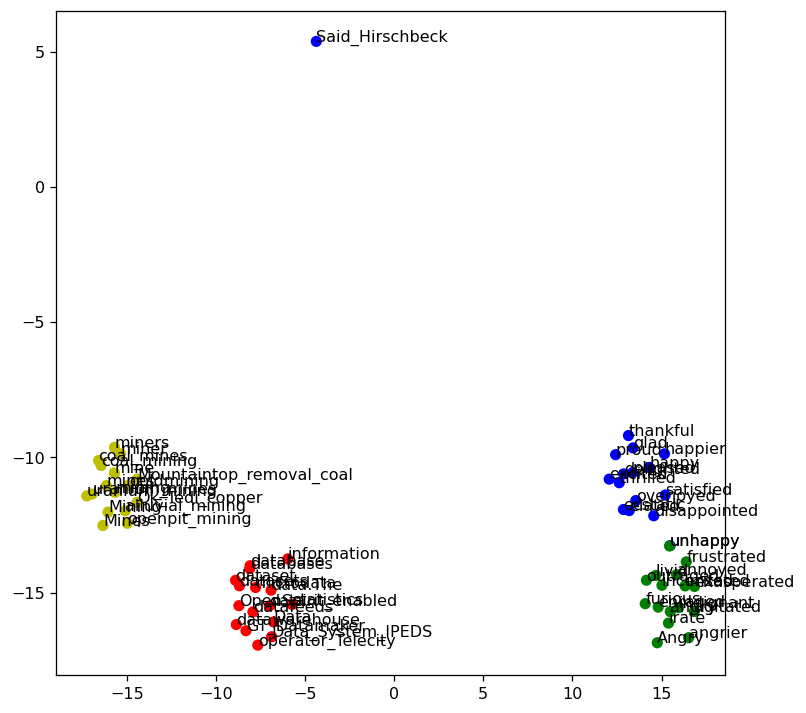

In [55]:
# t-sne
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

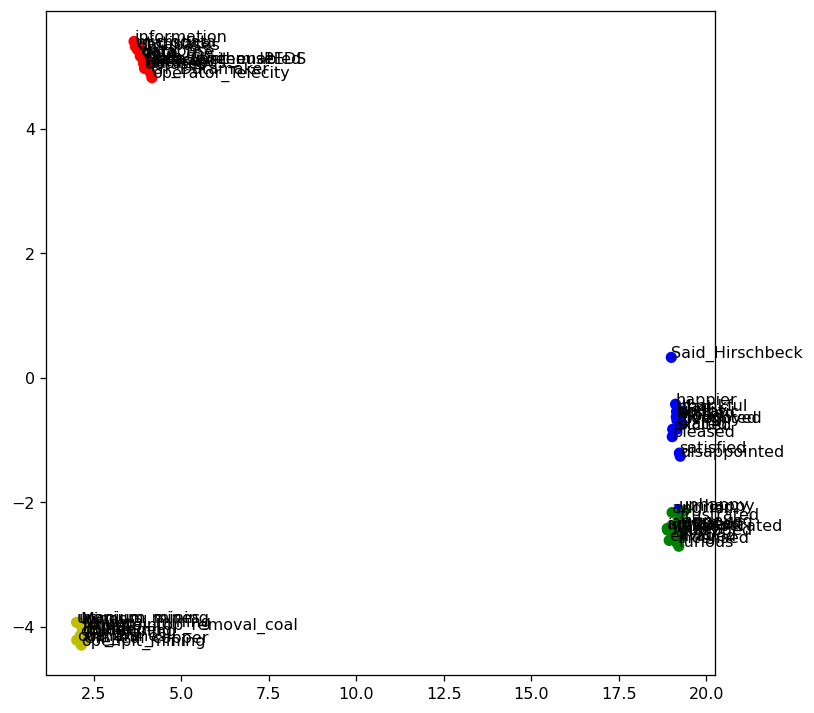

In [56]:
# umap
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [57]:
# umap figure has higher density than t-sne.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

2024-12-06 11:29:32,167 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information from raw data.

### Types of Data Mining
-------------------------

*   **Supervised Learning**: The algorithm is trained on labeled data to learn the relationship between features and target variables.
*   **Unsupervised Learning**: The algorithm discovers patterns in unlabeled data without prior knowledge of the expected outcome.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning, where the algorithm uses a small amount of labeled data and a large amount of unlabeled data.

### Data Mining Process
-------------------------

1.  **Data Collection**: Gathering relevant data from various sources, such as databases, files, or online platforms.
2.  **Data Preprocessing**: Cleaning, transforming, and preparing the

**We can use the IPython library to make the response look better:**

In [59]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [60]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information from raw data.

### Types of Data Mining
-------------------------

*   **Supervised Learning**: The algorithm is trained on labeled data to learn the relationship between features and target variables.
*   **Unsupervised Learning**: The algorithm discovers patterns in unlabeled data without prior knowledge of the expected outcome.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning, where the algorithm uses a small amount of labeled data and a large amount of unlabeled data.

### Data Mining Process
-------------------------

1.  **Data Collection**: Gathering relevant data from various sources, such as databases, files, or online platforms.
2.  **Data Preprocessing**: Cleaning, transforming, and preparing the data for analysis.
3.  **Pattern Discovery**: Applying algorithms to identify patterns, relationships, and insights in the data.
4.  **Evaluation**: Assessing the quality of the results and selecting the most relevant information.
5.  **Interpretation**: Translating the findings into actionable knowledge.

### Data Mining Techniques
---------------------------

*   **Clustering**: Grouping similar data points or records based on their characteristics.
*   **Decision Trees**: Creating a tree-like model to classify or predict outcomes based on feature values.
*   **Regression Analysis**: Modeling the relationship between continuous variables.
*   **Text Mining**: Analyzing and extracting insights from unstructured text data.

### Applications of Data Mining
------------------------------

*   **Marketing Automation**: Personalizing customer experiences and predicting behavior.
*   **Predictive Maintenance**: Anticipating equipment failures and scheduling maintenance.
*   **Customer Segmentation**: Dividing customers into groups based on their characteristics.
*   **Recommendation Systems**: Suggesting products or services based on user preferences.

### Challenges in Data Mining
---------------------------

*   **Data Quality Issues**: Handling missing, incomplete, or inconsistent data.
*   **Scalability**: Managing large datasets and computational resources.
*   **Interpretability**: Understanding the results of complex models and algorithms.
*   **Explainability**: Providing insights into the decision-making process.

### Conclusion
----------

Data mining is a powerful tool for extracting insights from large datasets. By understanding the different types, techniques, and applications of data mining, organizations can unlock valuable information to inform business decisions and drive growth.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [70]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content':'What is math? (in markdown format)'
    },
])

# print(response['message']['content'])
display(Markdown(response['message']['content']))

2024-12-06 13:19:40,951 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


# What is Math?

Mathematics, often simply referred to as math, is an intellectual field of study that encompasses a wide range of topics including numbers, quantities, shapes, patterns, and relationships between them.

## History of Mathematics

The history of mathematics dates back to ancient civilizations such as Egypt, Babylon, Greece, Rome, China, India and Arabia. The early development of mathematics was largely focused on practical problems in commerce, architecture, and engineering.

### Branches of Mathematics

Mathematics is a vast field with many branches that each study different aspects of numbers, shapes, patterns and relationships between them.

Some of the main branches include:

*   Algebra
*   Geometry
*   Trigonometry
*   Calculus

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

In [79]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['test1.jpg'] #Image with the dog
    },
])
display(Markdown(response2['message']['content']))

2024-12-06 18:10:28,157 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


In the center of the image, a tan and white dog with floppy ears is sitting on a wooden dock. The dog's tongue is out, suggesting it might be hot or excited. A red harness, adorned with gold lettering that reads "HAMBURG", is wrapped around its body, indicating the breed or origin of the dog.

The dock, made of planks, extends into a serene pond filled with lily pads and surrounded by trees in the background. The blue railings of the dock add a touch of color to the scene, contrasting with the natural greenery around it. The overall setting suggests a peaceful day out in nature.

In [80]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['test2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

2024-12-06 18:15:20,116 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The image features a **ginger cat** lying on its side, comfortably nestled in the middle of a **beige carpeted floor**. The cat's gaze is directed towards the camera, giving an impression of curiosity or perhaps mild annoyance at being photographed. Its body, adorned with alternating light and dark stripes, contrasts beautifully with its vibrant fur color.

To the right of the cat, there's a **black bowl**. The bowl is empty but has some food particles clinging to it, suggesting recent use. It stands out against the beige carpet due to its dark color and cylindrical shape. 

The overall scene suggests a quiet domestic setting, possibly a living room or bedroom. The cat's relaxed posture indicates it feels safe and secure in this environment.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['test3.jpg'] #Image with the stephen curry
    },
])

display(Markdown(response3['message']['content']))

# The description seems to be inaccurate, likely because the model lacks relevant data on basketball or human figures, making it unable to accurately interpret images that include these elements. 
# The picture is shown below

2024-12-06 18:21:17,491 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The image features a **ginger cat** lying on its side, comfortably nestled in the middle of a **beige carpeted floor**. The cat's gaze is directed towards the camera, giving an impression of curiosity or perhaps mild annoyance at being photographed. Its body, adorned with alternating light and dark stripes, contrasts beautifully with its vibrant fur color.

To the right of the cat, there's a **black bowl**. The bowl is empty but has some food particles clinging to it, suggesting recent use. It stands out against the beige carpet due to its dark color and cylindrical shape. 

The overall scene suggests a quiet domestic setting, possibly a living room or bedroom. The cat's relaxed posture indicates it feels safe and secure in this environment.

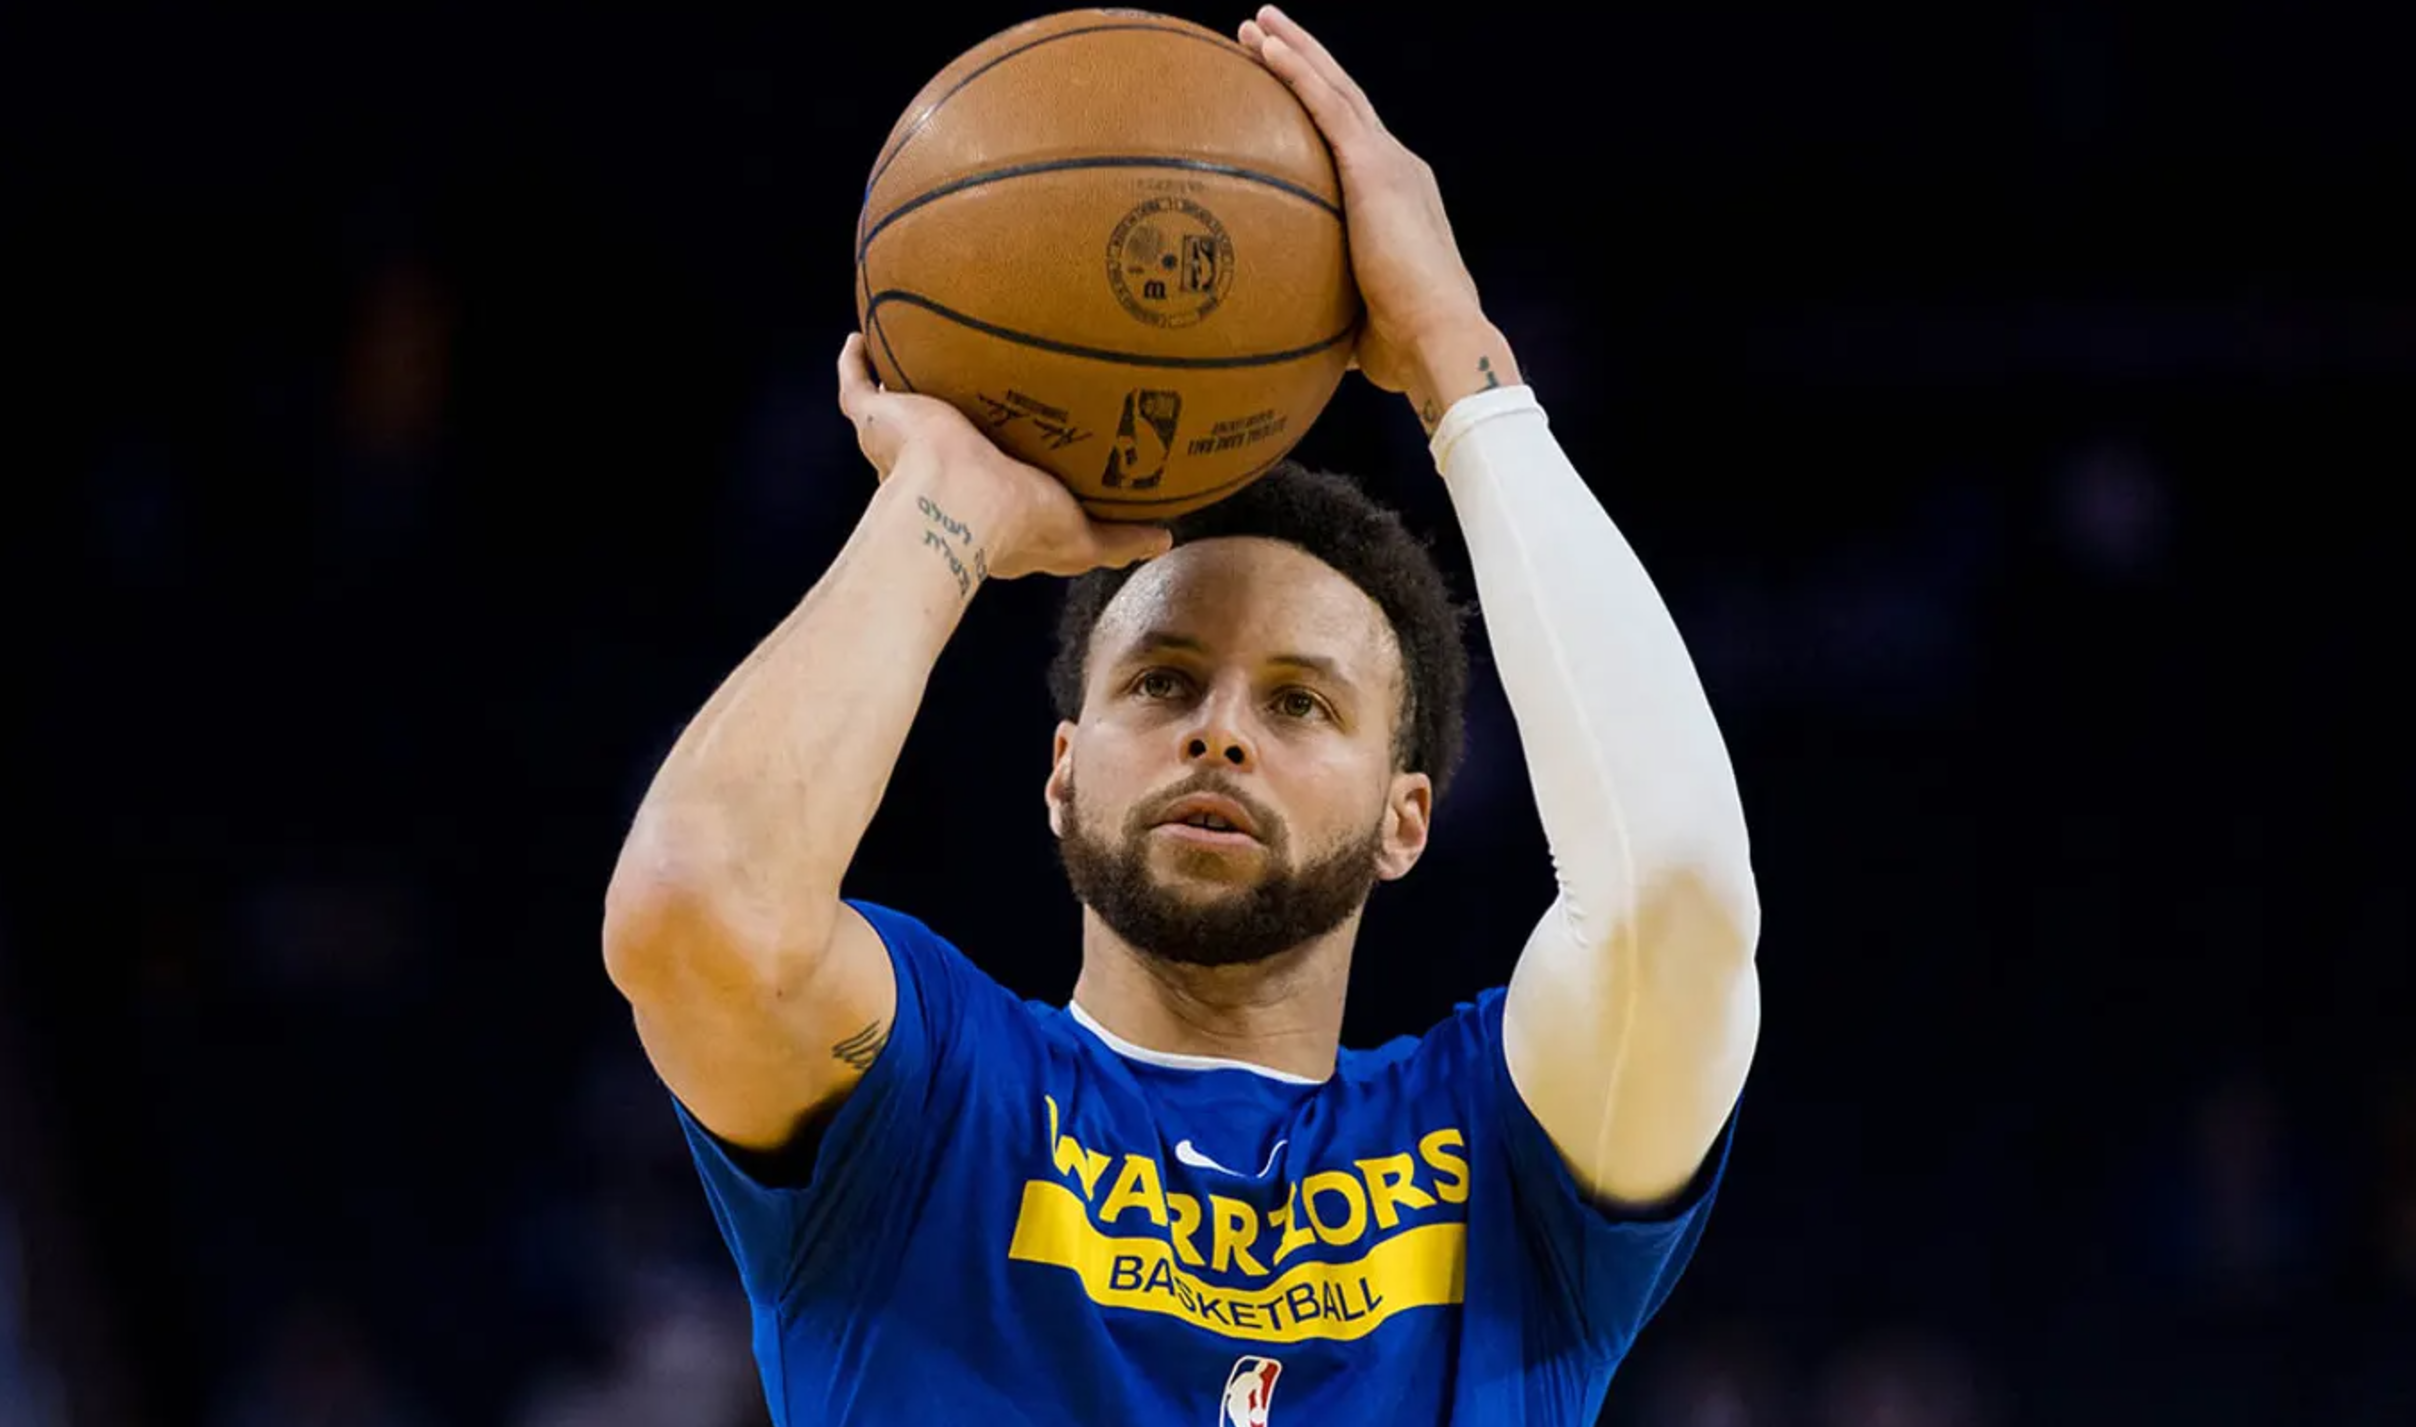

In [87]:
image = Image.open(r"test3.jpg")
image

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [88]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

2024-12-06 18:26:43,906 : WARNING : USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\mocce\AppData\Local\Temp\ipykernel_68364\3929822569.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
2024-12-06 18:26:45,935 : INFO : Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
2024-12-06 18:30:20,346 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


IBM's related solutions with Large Language Models (LLMs) include:

1. Watsonx AI: A platform that provides access to IBM's Granite model series, which serves as the generative AI backbone for other IBM products like Watsonx Assistant and Watsonx Orchestrate.
2. Watsonx Assistant: A conversational AI service that leverages LLMs to understand and respond to user queries, providing personalized customer experiences.
3. Watsonx Orchestrate: An orchestration platform that enables organizations to integrate and deploy LLM-based models across various applications and use cases.
4. Granite model series: A suite of LLMs designed for natural language understanding (NLU) and natural language processing (NLP), which can be used for tasks such as text generation, sentiment analysis, and entity extraction.

These solutions demonstrate IBM's commitment to leveraging LLMs to enhance NLU and NLP capabilities across various industries, including healthcare, finance, and customer service. By providing accessible APIs and integrations, IBM aims to enable organizations to tap into the power of LLMs and transform their business operations with more efficient and data-driven decision-making.


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [90]:
# Answer here

# Define the LLM model
llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL as data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split text for vector comparison
        splits = text_splitter.split_documents(docs)
        all_docs.extend(splits)  # Combine documents from all URLs

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embeddings)  # Create vector space
    return vectorstore.as_retriever()

# URLs or text documents to process
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/instruction-tuning",
    "https://cloud.google.com/use-cases/retrieval-augmented-generation"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

# Format retrieved documents for prompting
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example questions based on the documents/URLs
questions = [
    "What are the related solutions of IBM with LLMs?",  # Related to IBM URL
    "Why we use instruction-tuning ",  # Related to instruction-tuning URL
    "Pros and cons with RAG"  # Related to RAG URL
]

# Use the RAG chain to answer questions
for question in questions:
    result = rag_chain(question)
    print(f"Question: {question}\nAnswer:\n{result}\n{'-' * 80}")


2024-12-06 19:58:35,447 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Question: What are the related solutions of IBM with LLMs?
Answer:
IBM's related solutions with LLMs include:

1. Watsonx Assistant: Built on IBM's Granite model series, this product utilizes LLMs to provide human-like conversations and answers.
2. Watsonx Orchestrate: Another product built on the Granite model series, this solution leverages LLMs for various tasks such as content generation and language processing.

These solutions showcase IBM's investment in implementing LLMs at different levels to enhance natural language understanding (NLU) and natural language processing (NLP) capabilities.
--------------------------------------------------------------------------------


2024-12-06 19:59:16,098 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Question: Why we use instruction-tuning 
Answer:
We use instruction tuning because it allows Large Language Models (LLMs) to learn how to respond to user requests and provide more accurate and informative responses. Instruction tuning is a supervised learning approach that involves training an LLM on labeled pairs of input/output examples, where the inputs are tasks that resemble user requests and the outputs demonstrate desirable responses.

The goal of instruction tuning is to enable the LLM to "learn" how to respond to prompts like "teach me how to bake bread" by generating actual advice for baking bread. By adjusting the model weights to make the LLM's outputs resemble the examples in the instruction dataset, the model can learn to generalize its understanding of instructions and provide more accurate responses across a range of tasks.

The benefits of instruction tuning include:

1. Improved performance on novel tasks: Adding additional tasks to the instruction tuning dataset has 

2024-12-06 19:59:53,716 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Question: Pros and cons with RAG
Answer:
RAG is a tool that enables managers to track and analyze infrastructure usage across multiple projects and teams. Here are some pros and cons of using RAG:

Pros:

1. **Centralized dashboard**: RAG provides a centralized platform for managers to monitor and analyze infrastructure usage, making it easier to identify trends and anomalies.
2. **Real-time visibility**: Managers can gain real-time visibility into infrastructure usage, enabling them to respond quickly to changes or issues.
3. **Improved collaboration**: RAG facilitates collaboration between teams by providing a common platform for tracking and analyzing infrastructure usage.
4. **Reduced downtime**: By identifying potential issues before they occur, managers can take proactive steps to prevent downtime and ensure high availability of critical resources.
5. **Cost optimization**: RAG helps managers optimize costs by identifying underutilized or unused resources, allowing them to right-

The RAG system makes the response more accurate but consumes significant computing power, which increases the runtime of the code.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [91]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [92]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

2024-12-06 20:04:52,994 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:54,430 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:55,088 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:56,159 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:57,018 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:57,921 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:58,216 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:59,250 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:04:59,878 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:05:00,800 : IN

In [93]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

2024-12-06 20:59:44,799 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:45,984 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:46,989 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:47,650 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:49,265 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:50,491 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:51,160 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:52,696 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:53,224 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/embeddings "HTTP/1.1 200 OK"
2024-12-06 20:59:55,116 : IN

In [94]:
df_train #We can see the new column with the embeddings 

id                                               text  emotion  \
1019  20162  onus is on Pakistan' : MEAIndia after #Uri #te...     fear   
1497  20640  When I walk in darkness of despondency, Sc.ver...     fear   
2222  30218  Why have I only just started watching glee thi...      joy   
139   10139  @ManUtd you have had from me over the years is...    anger   
2547  30543  lol! no mention of pak PM or even his speech o...      joy   
...     ...                                                ...      ...   
3265  40438  @LucidBurrito Doesnt do it to anyone else, he ...  sadness   
1244  20387  Tomorrow is going to be a challenge, I have to...     fear   
787   10787  @jetmissTee I thought I peeped him on your sna...    anger   
3481  40654                 @chelseafc let them know it's the   sadness   
895   20038  #WeirdWednesday OKAY! That jump-scared the #Po...     fear   

      intensity                                         word_split  \
1019      0.708  [onus, is, on, Pakistan, MEAIndia, after, Uri,...   
1497      0.458  [When, I, walk, in, darkness, of, despondency,...   
2222      0.625  [Why, have, I, only, just, started, watching, ...   
139       0.667  [ManUtd, you, have, had, from, me, over, the, ...   
2547      0.396  [lol, no, mention, of, pak, PM, or, even, his,...   
...         ...                                                ...   
3265      0.457  [LucidBurrito, Doesnt, do, it, to, anyone, els...   
1244      0.580  [Tomorrow, is, going, to, be, a, challenge, I,...   
787       0.271  [jetmissTee, I, thought, I, peeped, him, on, y...   
3481      0.300          [chelseafc, let, them, know, it, 's, the]   
895       0.875  [WeirdWednesday, OKAY, That, jump-scared, the,...   

                                         text_tokenized  \
1019  [onus, is, on, Pakistan, ', :, MEAIndia, after...   
1497  [When, I, walk, in, darkness, of, despondency,...   
2222  [Why, have, I, only, just, started, watching, ...   
139   [@, ManUtd, you, have, had, from, me, over, th...   
2547  [lol, !, no, mention, of, pak, PM, or, even, h...   
...                                                 ...   
3265  [@, LucidBurrito, Doesnt, do, it, to, anyone, ...   
1244  [Tomorrow, is, going, to, be, a, challenge, ,,...   
787   [@, jetmissTee, I, thought, I, peeped, him, on...   
3481       [@, chelseafc, let, them, know, it, 's, the]   
895   [#, WeirdWednesday, OKAY, !, That, jump-scared...   

                                             embeddings  
1019  [0.09248029440641403, -0.9190003871917725, 1.9...  
1497  [0.07484310865402222, 0.09330260753631592, -0....  
2222  [0.5265343189239502, 1.3101320266723633, 1.713...  
139   [-1.122999906539917, 0.8473930954933167, 3.059...  
2547  [0.6273946762084961, 1.6403789520263672, 1.466...  
...                                                 ...  
3265  [-0.36221781373023987, -0.447094202041626, 3.4...  
1244  [1.0351426601409912, 0.3689936399459839, -0.20...  
787   [-0.5829766988754272, 0.7466840147972107, 0.88...  
3481  [0.10624463856220245, 0.21402907371520996, -0....  
895   [-0.557453453540802, -0.025242162868380547, 0....  

[3613 rows x 7 columns]

In [95]:
df_test #We can see the new column with the embeddings 

id                                               text emotion  \
263  30892  Sioux Valley wins home competitive #cheer invi...     joy   
125  21188  But I was so intrigued by your style, boy.Alwa...    fear   
164  21227  @chutneysupercat hi lovely brownie, MM is call...    fear   
126  21189  @SAHARTHERAPPER I unfollowed without hesitatio...    fear   
123  21186  On @Varneyco/@FoxBusiness to talk latest on #C...    fear   
..     ...                                                ...     ...   
252  30881  I hate it when im singing and some idiot think...     joy   
52   10909  I miss my gran singing Rawhide, in her deep ba...   anger   
200  30829  @Casper10666 I assure you there is no laughter...     joy   
225  30854  So far ours greet have raised £250 for @HGatCh...     joy   
205  30834  Be it a rainy day, be it cheerful sunshine, I ...     joy   

     intensity                                         word_split  \
263      0.583  [Sioux, Valley, wins, home, competitive, cheer...   
125      0.292  [But, I, was, so, intrigued, by, your, style, ...   
164      0.440  [chutneysupercat, hi, lovely, brownie, MM, is,...   
126      0.229  [SAHARTHERAPPER, I, unfollowed, without, hesit...   
123      0.604  [On, Varneyco/, FoxBusiness, to, talk, latest,...   
..         ...                                                ...   
252      0.080  [I, hate, it, when, im, singing, and, some, id...   
52       0.292  [I, miss, my, gran, singing, Rawhide, in, her,...   
200      0.167  [Casper10666, I, assure, you, there, is, no, l...   
225      0.625  [So, far, ours, greet, have, raised, £250, for...   
205      0.245  [Be, it, a, rainy, day, be, it, cheerful, suns...   

                                            embeddings  
263  [-0.2532467544078827, 1.263911247253418, 5.088...  
125  [-1.2155362367630005, -0.4801228642463684, 2.7...  
164  [-1.0097180604934692, 0.43339189887046814, 2.5...  
126  [-1.349173903465271, 1.5101909637451172, 1.550...  
123  [-0.6804038286209106, -0.7428016662597656, -0....  
..                                                 ...  
252  [0.31127166748046875, 0.845703661441803, 0.649...  
52   [0.28263378143310547, 1.2706190347671509, -1.9...  
200  [1.1021414995193481, 0.8019823431968689, -2.11...  
225  [-0.3827594518661499, 1.756934404373169, 3.360...  
205  [-0.2140054702758789, -0.5386250615119934, -1....  

[347 rows x 6 columns]

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [97]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [98]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [99]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.39      0.44      0.41        84
        fear       0.55      0.55      0.55       110
         joy       0.42      0.42      0.42        79
     sadness       0.46      0.39      0.42        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



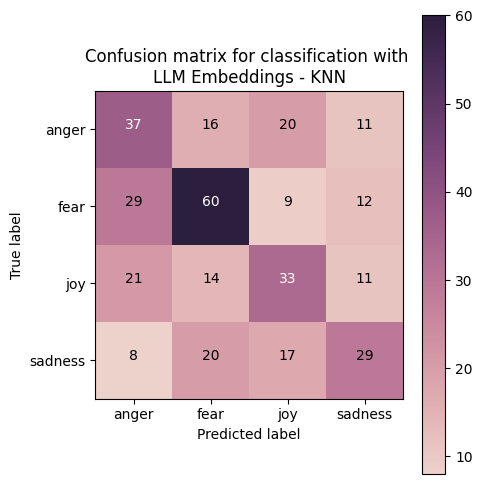

In [100]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [101]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)


(3613, 3072)

In [102]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [103]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [104]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [105]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3952 - loss: 1.3850 - val_accuracy: 0.5130 - val_loss: 1.1311
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6381 - loss: 0.8663 - val_accuracy: 0.5274 - val_loss: 1.0914
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.6440 - val_accuracy: 0.5850 - val_loss: 1.0825
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.5704 - val_accuracy: 0.5706 - val_loss: 1.1947
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4423 - val_accuracy: 0.5706 - val_loss: 1.2357
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8649 - loss: 0.3658 - val_accuracy: 0.5418 - val_loss: 1.4514
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8878 - loss: 0.3054 - val_accuracy: 0.5533 - val_loss: 1.6107
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2359 - val_accuracy: 0.

In [109]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[9.8666835e-01, 3.3739529e-04, 4.3889304e-04, 1.2555443e-02],
       [4.4763159e-02, 5.1646057e-04, 9.5263308e-01, 2.0872843e-03],
       [1.9996001e-03, 5.7106662e-01, 1.5678561e-05, 4.2691818e-01],
       [6.9511813e-01, 9.6924297e-05, 2.0475676e-03, 3.0273730e-01],
       [3.3915583e-03, 6.3880986e-01, 1.6015655e-01, 1.9764213e-01]],
      dtype=float32)

In [110]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'fear', 'anger', 'fear'], dtype=object)

In [111]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [113]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.466371  1.215911      0.512968  1.131111
1       1  0.657072  0.831317      0.527378  1.091358
2       2  0.731248  0.661505      0.585014  1.082545
3       3  0.787157  0.560746      0.570605  1.194690
4       4  0.827844  0.464229      0.570605  1.235730
5       5  0.853861  0.382486      0.541787  1.451432
6       6  0.892610  0.298902      0.553314  1.610704
7       7  0.914476  0.244958      0.550432  1.545619
8       8  0.912538  0.238269      0.573487  1.617480
9       9  0.934680  0.185277      0.553314  1.874224
10     10  0.931636  0.197798      0.576369  1.763792
11     11  0.946859  0.158377      0.564842  1.916542
12     12  0.955162  0.135661      0.561960  2.043937
13     13  0.960144  0.118551      0.585014  1.838324
14     14  0.968447  0.100931      0.561960  2.220015
15     15  0.969278  0.101742      0.579251  2.091663
16     16  0.970662  0.098795      0.564842  2.031187
17     17  0.970385  0.096420      0.582133  2.041005
18     18  0.965679  0.107719      0.559078  2.312347
19     19  0.965679  0.099494      0.561960  2.146746
20     20  0.969554  0.090035      0.559078  2.291311
21     21  0.952117  0.133482      0.533141  2.642182
22     22  0.944091  0.154918      0.556196  2.419042
23     23  0.963188  0.105949      0.559078  2.555751
24     24  0.975644  0.072834      0.561960  2.356096

In [114]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.55      0.52      0.54        84
        fear       0.66      0.61      0.64       110
         joy       0.56      0.57      0.57        79
     sadness       0.45      0.53      0.49        74

    accuracy                           0.56       347
   macro avg       0.56      0.56      0.56       347
weighted avg       0.57      0.56      0.56       347



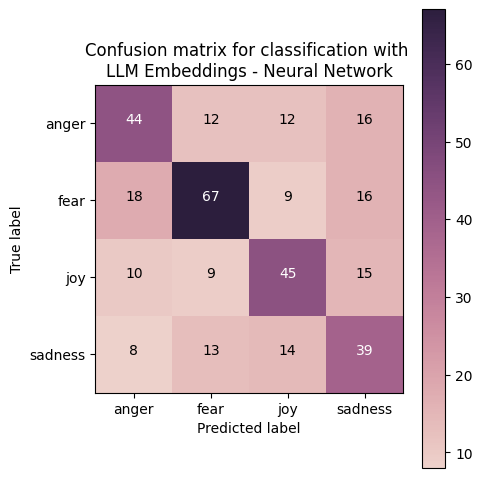

In [115]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

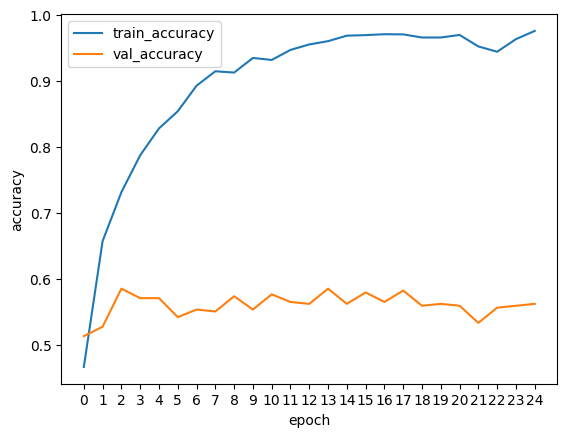

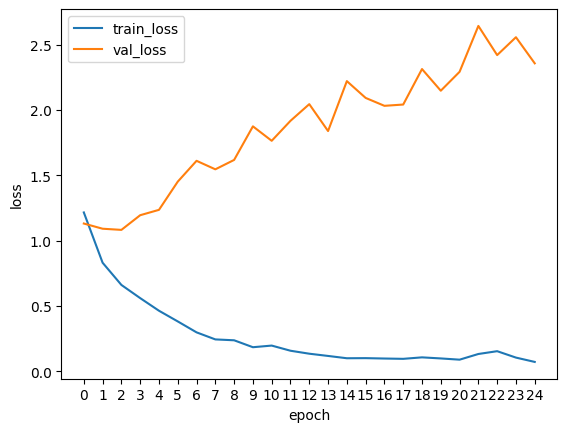

In [116]:

sns.lineplot(training_log,x="epoch",y="accuracy",label="train_accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="val_accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="train_loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="val_loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()


We have three type of model to fit:  
1.Use decision tree with BOW pretrain  
testing accuracy: 0.68    
2.Use KNN with LLM Embeddings  
testing Accuracy: 0.458    
3.Use NN with LLM Embeddings  
testing accuracy: 0.56  
In this figure, we know that if epoch larger than 0, val_loss is larger than train_loss. It means there is overfitting. This problem that the LLM Embeddings method worse than only BOW transform.

In this example, I understand that a more complex model is not always more accurate. Sometimes, a simple model can provide a better solution than a complex one. It is important to choose an appropriate model to address our problem.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [122]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

{'anger':         id                                               text emotion  \
 486  10486  @BearGrylls for your next series will u do a c...   anger   
 546  10546  @WestonKoury so leafy can roast the Pokemon go...   anger   
 659  10659  The best revenge is massive success. –Frank Si...   anger   
 63   10063                OOOOOOOOH MY GOD UUUUGGGGHHHHHHHHH    anger   
 471  10471  I need all your attention! If I don't I'll pout..   anger   
 
      intensity                                         word_split  \
 486      0.458  [BearGrylls, for, your, next, series, will, u,...   
 546      0.491  [WestonKoury, so, leafy, can, roast, the, Poke...   
 659      0.375  [The, best, revenge, is, massive, success, –Fr...   
 63       0.750            [OOOOOOOOH, MY, GOD, UUUUGGGGHHHHHHHHH]   
 471      0.479  [I, need, all, your, attention, If, I, do, n't...   
 
                                         text_tokenized  \
 486  [@, BearGrylls, for, your, next, series, will,...   
 546 

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

We use n-shot classification to help us achieve accurate classifications. If n getting larger, the model will response more accurate. But it cost more computing source and time. So if we want this model reply a general question, using 0-shot is a better way than 5-shot. If we want know a specific field, using 5-shot is a better choice than 0-shot.